## Systems of non-linear equations

Sometimes we need to solve a system of non-linear equations, e.g.

$$
f_1(x_1,\ldots,x_N) = 0,\\
f_2(x_1,\ldots,x_N) = 0,\\
\ldots \\
f_N(x_1,\ldots,x_N) = 0
$$

Denoting ${\bf f} = (f_1,\ldots,f_N)$ and ${\bf x} = (x_1,\ldots,x_N)$ this can be written in compact form as
$$
{\bf f}({\bf x}) = 0~.
$$


As an example of a system of non-linear equations consider the intersection point (x,y) of functions $y = x + \exp(-x) - 2$ and $y = x^3 - x - 3$. This can be cast as a solution to a system of two non-linear equations
$$
x + \exp(-x) - 2 - y = 0,\\
x^3 - x - 3 - y = 0.
$$

This implies $(x,y) = (x_1,x_2)$, 
$$f_1(x_1,x_2) = x_1 + \exp(-x_1) - 2 - x_2$$ 
and $$f_2(x_1,x_2) = x_1^3 - x_1 - 3 - x_2$$.

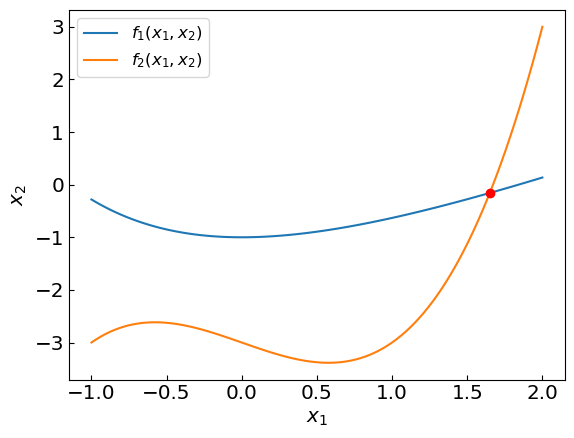

In [7]:
import numpy as np

import matplotlib.pyplot as plt
# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)


def y1f(x):
    return x + np.exp(-x) - 2.

def y2f(x):
    return x**3 - x - 3.

xref = np.linspace(-1,2,100)
y1ref = y1f(xref)
y2ref = y2f(xref)

plt.xlabel("${x_1}$")
plt.ylabel("${x_2}$")
plt.plot(xref,y1ref,label = '${f_1(x_1,x_2)}$')
plt.plot(xref,y2ref,label = '${f_2(x_1,x_2)}$')
plt.plot([1.64998819 ], [-0.15795963], 'ro')
plt.legend()
plt.show()

In [8]:
def f(x):
    return np.array([x[0] + np.exp(-x[0]) - 2. - x[1], x[0]**3 - x[0] - 3 - x[1]])

def jacobian(x):
    return np.array([[1. - np.exp(-x[0]), -1.], [3*x[0]**2 - 1., -1]])

We can also introduce a scalar-valued *objective function*
$$
\tilde{f}(\mathbf{x}) = \frac{\mathbf{f}(\mathbf{x}) \cdot \mathbf{f}(\mathbf{x})}{2}
$$
which is equal to zero at the root.
Finding roots is thus similar to minimizing this function

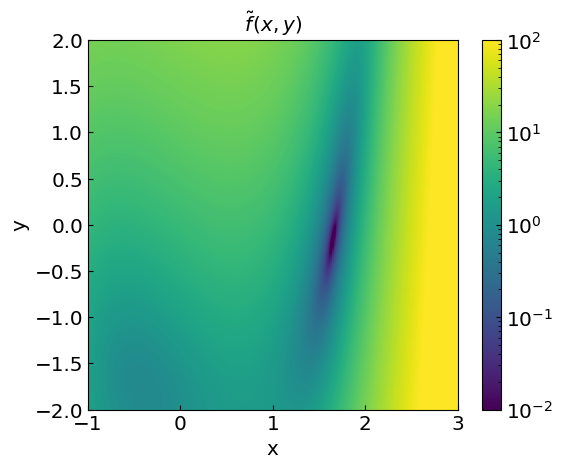

In [9]:
from matplotlib import colors, cm, pyplot as plt

def ftil(f):
    return np.dot(f,f) / 2.

xplot = np.linspace(-1,3,200)
yplot = np.linspace(-2,2,200)

X, Y = np.meshgrid(xplot, yplot)


fdat = []
for yin in yplot:
    ftmp = []
    for xin in xplot:
        ftmp.append(ftil(f([xin,yin])))
    fdat.append(ftmp)

funclabel = "${\\tilde f(x,y)}$"

#plt.contourf(X, Y, Vdip, 10)
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
norm = colors.LogNorm(0.01, 100., clip='True') # log scale
CS = plt.imshow(fdat, origin="lower",extent=[-1,3,-2,2], aspect=1, norm = norm)
#CS = plt.imshow(fdat, vmax=5, vmin=0.,origin="lower",extent=[-1,3,-2,2], aspect=1)
#plt.plot([0],[0],'r.')
plt.colorbar(CS)
plt.show()

Newton-Raphson method can be readily generalized to multi-dimensional systems of equations.
There is also a multi-dimensional version of the secant method called Broyden's method.

Let us explore these methods

## Newton method

Recall the Taylor expansion of function $f$ around the root $x^*$ in one-dimensional case:
$$
f(x^*) \approx f(x) + f'(x) (x^* - x)
$$

The multi-dimensional version of this expansion reads
$$
{\bf f} ({\bf x^*}) \approx {\bf f}({\bf x}) + J(\bf{x}) ({\bf x^*} - {\bf x})
$$

Here $J(\mathbf{x})$ is the Jacobian, i.e. a $N \times N$ matrix of derivatives evaluated at $\bf{x}$
$$
J_{ij}(\mathbf{x}) = \frac{\partial f_i}{\partial x_j}~.
$$

Given that $\mathbf{f}(\mathbf{x^*}) = 0$, we have
$$
J(\mathbf{x}) (\mathbf{x^*} - \mathbf{x}) \approx -\mathbf{f}(\mathbf{x}),
$$
which is a system of linear equations for $\mathbf{x^*} - \mathbf{x}$.
Solving this system yields
$$
\mathbf{x^*} \approx \mathbf{x} - J^{-1}(\mathbf{x}) \, \mathbf{f}(\mathbf{x})~.
$$
Here $J^{-1}(\mathbf{x})$ is the inverse Jacobian matrix.

The multi-dimensional Newton's method is an iterative procedure
$$
\mathbf{x_{n+1}} = \mathbf{x_n} - J^{-1}(\mathbf{x_n}) \, \mathbf{f}(\mathbf{x_n})~.
$$

In [10]:
import numpy as np

last_newton_iterations = 0
newton_verbose = True


def newton_method_multi(
    f, 
    jacobian, 
    x0, 
    accuracy=1e-8, 
    max_iterations=100):
    x = x0
    global last_newton_iterations
    last_newton_iterations = 0
    
    if newton_verbose:
        print("Iteration: ", last_newton_iterations)
        print("x = ", x0)
        print("f = ", f(x0))
        print("|f| = ", ftil(f(x0)))
        
    for i in range(max_iterations):
        last_newton_iterations += 1
        f_val = f(x)
        jac = jacobian(x)
        jinv = np.linalg.inv(jac)
        delta = np.dot(jinv, -f_val)
        x = x + delta
        
        if newton_verbose:
            print("Iteration: ", last_newton_iterations)
            print("x = ", x)
            print("f = ", f(x))
            print("|f| = ", ftil(f(x)))
            
        if np.linalg.norm(delta, ord=2) < accuracy:
            return x
    return x


Iteration:  0
x =  [-10. -10.]
f =  [22024.46579481  -983.        ]
|f| =  243021691.27330557
Iteration:  1
x =  [  -8.96940576 -684.8523231 ]
f =  [8532.813067    -30.76911508]
|f| =  36404922.78743139
Iteration:  2
x =  [  -7.91194896 -461.46093549]
f =  [3181.25436335  -28.9067052 ]
|f| =  5060607.460972693
Iteration:  3
x =  [  -6.81088271 -284.69197793]
f =  [1183.55275807  -27.441206  ]
|f| =  700775.0754597257
Iteration:  4
x =  [  -5.65185495 -151.99684421]
f =  [429.16429115 -25.89112817]
|f| =  92426.16965602108
Iteration:  5
x =  [ -4.45007023 -63.9222545 ]
f =  [143.10514177 -22.75297233]
|f| =  10498.389675111277
Iteration:  6
x =  [ -3.29056652 -18.94934023]
f =  [ 40.51684882 -16.38978178]
|f| =  955.1199925414086
Iteration:  7
x =  [-2.2981514 -4.0944362]
f =  [ 9.75204603 -8.74509872]
|f| =  85.78957672427885
Iteration:  8
x =  [-1.52096896 -1.30265052]
f =  [ 2.35833922 -3.69490888]
|f| =  9.607057739215177
Iteration:  9
x =  [-0.88490292 -1.2193018 ]
f =  [ 0.7571480

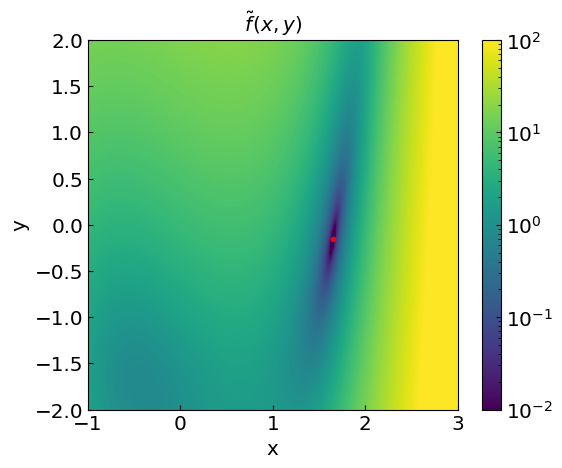

In [11]:
x0 = np.array([-10., -10.])
root = newton_method_multi(f, jacobian, x0)
#print(root)

xplot = np.linspace(-1,3,200)
yplot = np.linspace(-2,2,200)
fdat = []
for yin in yplot:
    ftmp = []
    for xin in xplot:
        ftmp.append(ftil(f([xin,yin])))
    fdat.append(ftmp)

funclabel = "${\\tilde f(x,y)}$"

#plt.contourf(X, Y, Vdip, 10)
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
norm = colors.LogNorm(0.01, 100., clip='True') # log scale
CS = plt.imshow(fdat, origin="lower",extent=[-1,3,-2,2], aspect=1, norm = norm)
#CS = plt.imshow(fdat, vmax=5, vmin=0.,origin="lower",extent=[-1,3,-2,2], aspect=1)
plt.plot([root[0]],[root[1]],'r.')
plt.colorbar(CS)
plt.show()

## Broyden method

Generalization of the secant method to multiple dimensions

Approximates the Jacobian by finite differences (see lecture notes)

In [12]:
import numpy as np

last_broyden_iterations = 0
broyden_verbose = True

# Direct implementation of Broyden's method 
# (using matrix inversion at each step)
def broyden_method_direct(
    f, 
    x0, 
    accuracy=1e-8, 
    max_iterations=100):
    global last_broyden_iterations
    last_broyden_iterations = 0
    x = x0
    n = x0.shape[0]
    J = np.eye(n)
    
        
    for i in range(max_iterations):
        last_broyden_iterations += 1
        f_val = f(x)
        Jinv = np.linalg.inv(J)
        delta = np.dot(Jinv, -f_val)
        x = x + delta
        if np.linalg.norm(delta, ord=2) < accuracy:
            return x
        f_new = f(x)
        u = f_new - f_val
        v = delta
        J = J + np.outer(u - J.dot(v), v) / np.dot(v, v)
            
    return x

[ 1.64998819 -0.15795963]


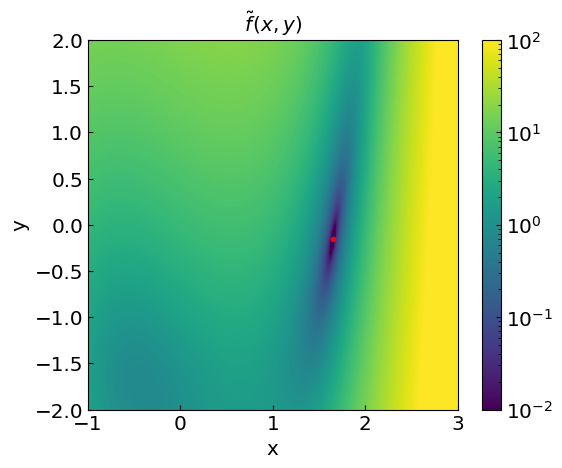

In [13]:
x0 = np.array([0., 0.])
root = broyden_method_direct(f, x0)
print(root)

xplot = np.linspace(-1,3,200)
yplot = np.linspace(-2,2,200)
fdat = []
for yin in yplot:
    ftmp = []
    for xin in xplot:
        ftmp.append(ftil(f([xin,yin])))
    fdat.append(ftmp)

funclabel = "${\\tilde f(x,y)}$"

#plt.contourf(X, Y, Vdip, 10)
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
norm = colors.LogNorm(0.01, 100., clip='True') # log scale
CS = plt.imshow(fdat, origin="lower",extent=[-1,3,-2,2], aspect=1, norm = norm)
plt.plot([root[0]],[root[1]],'r.')
plt.colorbar(CS)
plt.show()

In [14]:
import numpy as np

last_broyden_iterations = 0
broyden_verbose = True


# Implementation of Broyden's method using Sherman-Morrison formula
def broyden_method(
    f, 
    x0, 
    accuracy=1e-8, 
    max_iterations=100):
    global last_broyden_iterations
    last_broyden_iterations = 0
    x = x0
    n = x0.shape[0]
    Jinv = np.eye(n)
    #Jinv = np.linalg.inv(jacobian(x))
    
    if broyden_verbose:
        print("Iteration: ", last_broyden_iterations)
        print("x = ", x0)
        print("f = ", f(x0))
        print("|f| = ", ftil(f(x0)))
        
    for i in range(max_iterations):
        last_broyden_iterations += 1
        f_val = f(x)
        delta = -Jinv.dot(f_val)
        x = x + delta
        if np.linalg.norm(delta, ord=2) < accuracy:
            return x
        f_new = f(x)
        df = f_new - f_val
        dx = delta
        Jinv = Jinv + np.outer(dx - Jinv.dot(df), dx.T.dot(Jinv)) / np.dot(dx.T, Jinv.dot(df))
        
        if broyden_verbose:
            print("Iteration: ", last_broyden_iterations)
            print("x = ", x)
            print("f = ", f(x))
            print("|f| = ", ftil(f(x)))
            
    return x

[ 1.64998819 -0.15795963]


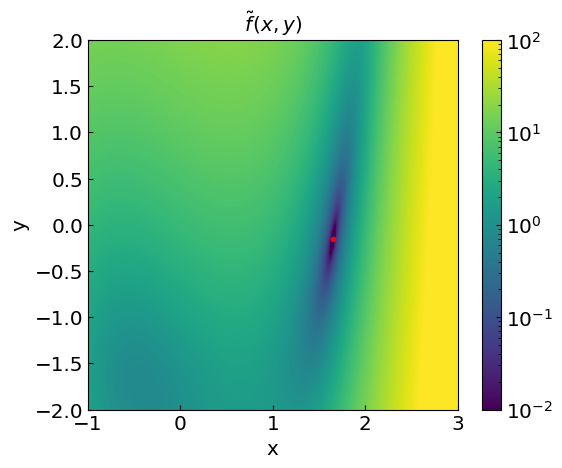

In [15]:
x0 = np.array([0., 0.])
broyden_verbose = False
root = broyden_method(f, x0, 1.e-8, 5000)
print(root)

xplot = np.linspace(-1,3,200)
yplot = np.linspace(-2,2,200)
fdat = []
for yin in yplot:
    ftmp = []
    for xin in xplot:
        ftmp.append(ftil(f([xin,yin])))
    fdat.append(ftmp)

funclabel = "${\\tilde f(x,y)}$"

#plt.contourf(X, Y, Vdip, 10)
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
norm = colors.LogNorm(0.01, 100., clip='True') # log scale
CS = plt.imshow(fdat, origin="lower",extent=[-1,3,-2,2], aspect=1, norm = norm)
plt.plot([root[0]],[root[1]],'r.')
plt.colorbar(CS)
plt.show()